In [30]:
# data processing 
import numpy as np  
import pandas as pd  
# data visualizision
import matplotlib.pyplot as plt  
import missingno  
import seaborn as sns  
# classification models
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.metrics import classification_report
# evaluation indicators 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc  
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import average_precision_score, f1_score, precision_score, recall_score 

In [24]:
headers = [
    'age', 'workclass',  'fnlwgt', 
    'education', 'education-num',  'marital-status', 
    'occupation',  'relation',  'race', 
    'sex',  'capital-gain',  'capital-loss', 
    'hours-per-week',  'native-country', 'predclass']

train_raw = pd.read_csv(
    'adult.data',
    header=None,
    names=headers,
    sep=',\s',
    na_values='?',
    engine='python',
    skiprows=1
)
test_raw = pd.read_csv(
    'adult.test',
    header=None,
    names=headers,
    sep=',\s',
    engine='python',
    na_values='?',
    skiprows=1
)

dataset_raw = train_raw.append(test_raw)

In [25]:
dataset_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:>

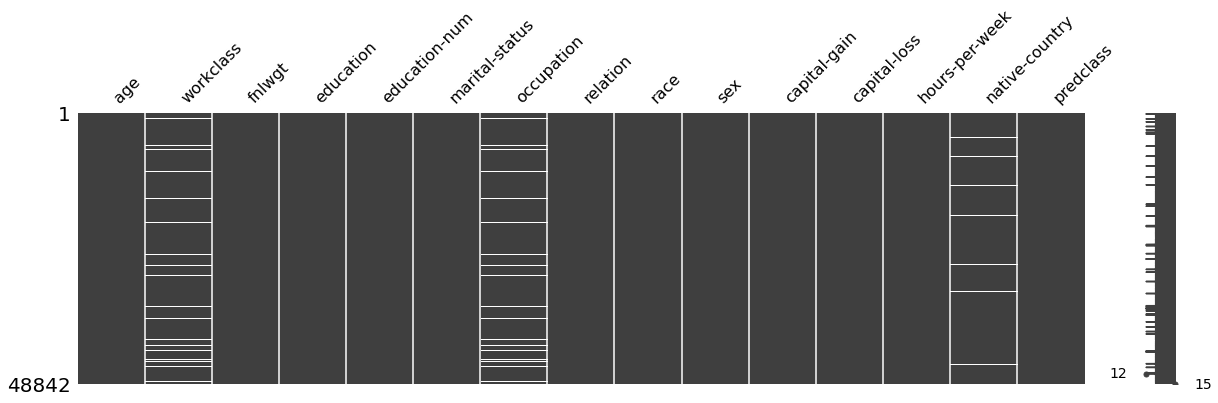

In [4]:
missingno.matrix(dataset_raw, figsize = (20,5))   

In [6]:
dataset_raw.fillna(value={"workclass":dataset.workclass.mode()[0],
                     "occupation":dataset.occupation.mode()[0],
                     "native-country":dataset["native-country"].mode()[0]},
              inplace=True)

<AxesSubplot:>

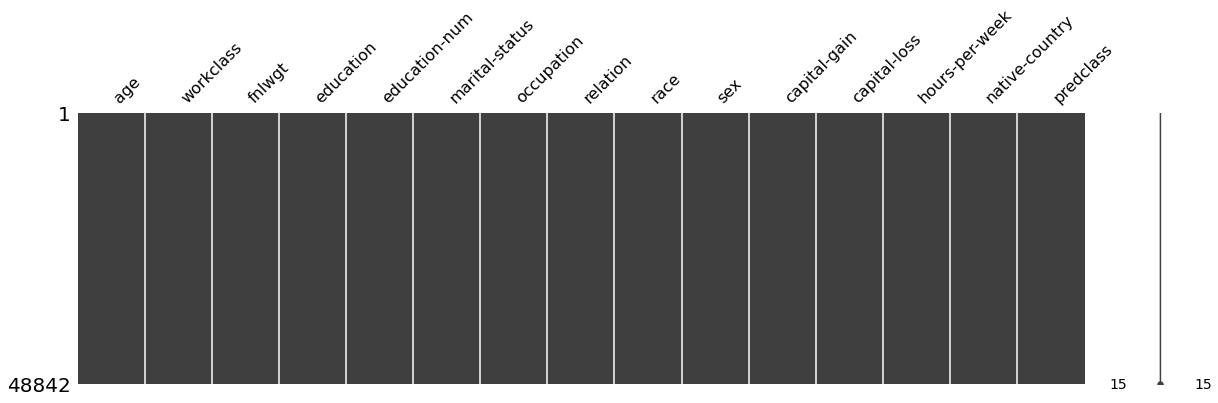

In [7]:
missingno.matrix(dataset_raw, figsize = (20,5))   

In [9]:
# income indicate  
dataset.loc[dataset['predclass'] == '>50K.', 'income-level'] = '>50K'  
dataset.loc[dataset['predclass'] == '<=50K.', 'income-level'] = '<=50K'  

In [10]:
# plot distribution 
def plot_distribution(dataset, cols, width, height, hspace, wspace):  
    plt.style.use('seaborn-whitegrid')  
    fig = plt.figure(figsize=(width,height))  
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)  
    rows = math.ceil(float(dataset.shape[1]) / cols)  
    for i, column in enumerate(dataset.columns):  
        ax = fig.add_subplot(rows, cols, i + 1)  
        ax.set_title(column)  
        if dataset.dtypes[column] == np.object:  
            g = sns.countplot(y=column, data=dataset)  
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]  
            g.set(yticklabels=substrings)  
            plt.xticks(rotation=25)  
        else:  
            g = sns.distplot(dataset[column])  
            plt.xticks(rotation=25)  

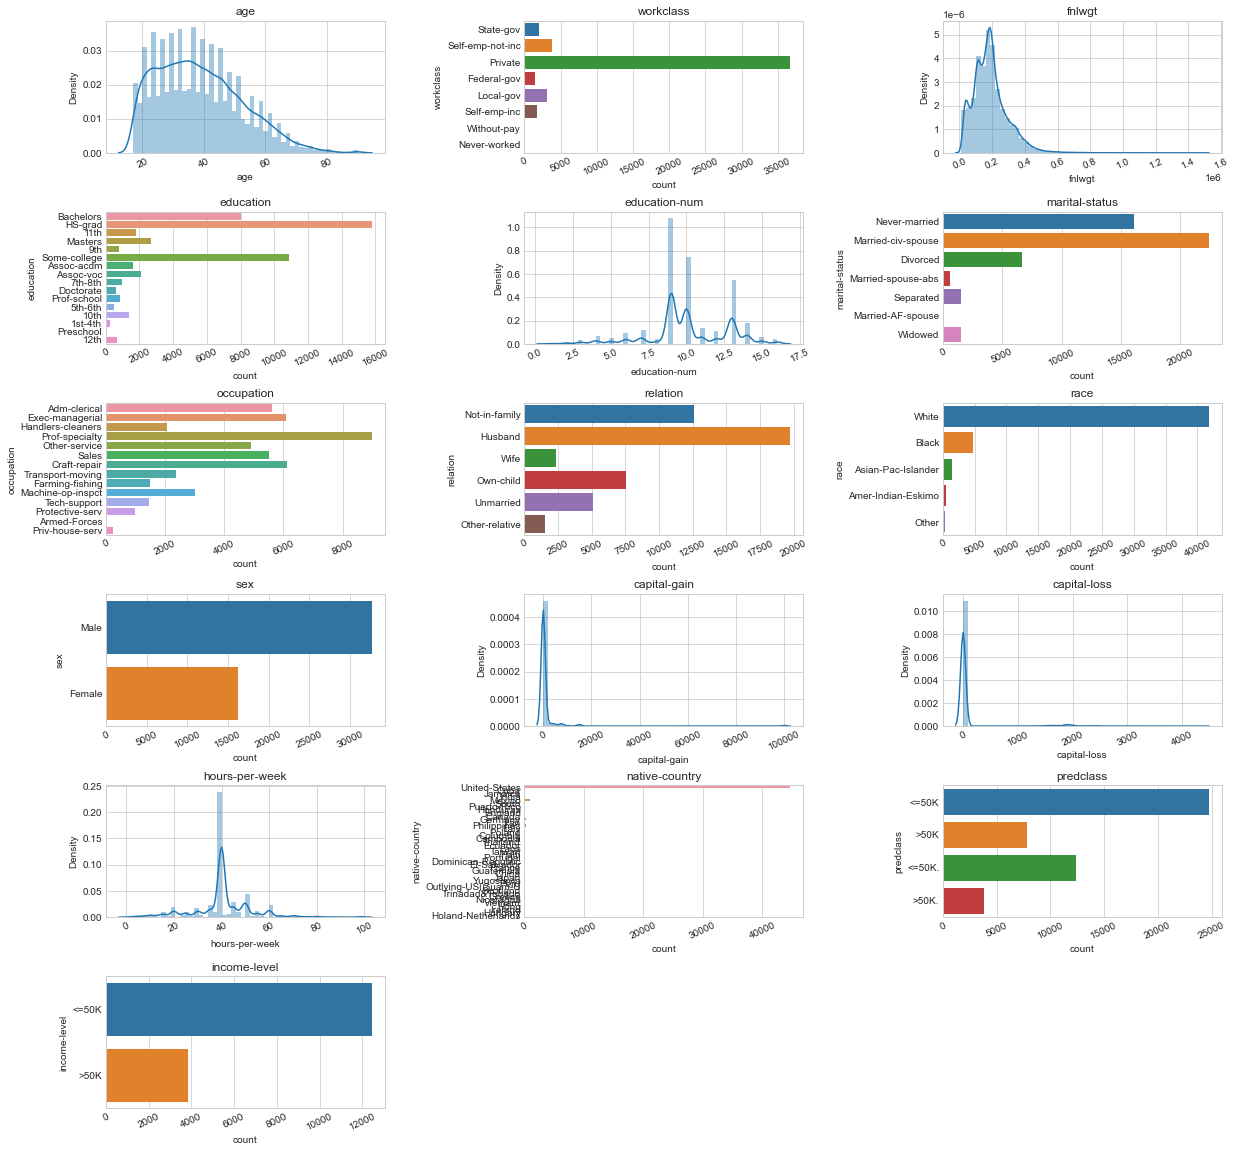

In [11]:
plot_distribution(dataset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

<AxesSubplot:>

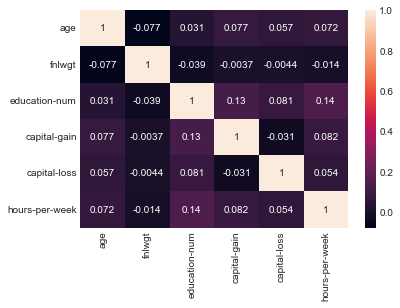

In [22]:
sns.heatmap(dataset_raw.corr(),annot=True)

In [26]:
dataset_raw.reset_index(inplace=True)# 从原来的修改
dataset_raw.drop('index', axis=1,inplace=True)
print('merge over')
data_bin = pd.DataFrame() 
data_con = pd.DataFrame() 

#    - >50k, 1
#    - <=50, 0
dataset_raw.loc[dataset_raw['predclass'] == '>50K', 'predclass' ] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K', 'predclass'] = 0

dataset_raw.loc[dataset_raw['predclass'] == '>50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K.', 'predclass' ] = 0


data_bin['predclass'] = dataset_raw['predclass']
data_con['predclass'] = dataset_raw['predclass']
print('feature label over')
# age
data_con['age'] = dataset_raw['age']   # conitnue
data_bin['age'] = pd.cut(dataset_raw['age'], 10)   # bin
print('feature age over')
# workclass
dataset_raw.loc[dataset_raw['workclass']=='Without-pay','workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass']=='Never-worked','workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass']=='Federal-gov','workclass']  = 'Fed-gov'
dataset_raw.loc[dataset_raw['workclass']=='State-gov','workclass']  = 'Non-Fed-gov'
dataset_raw.loc[dataset_raw['workclass']=='Local-gov','workclass']  = 'Non-Fed-gov'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-not-inc','workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-inc','workclass']  = 'Self-emp'
data_bin['workclass'] = dataset_raw['workclass']
data_con['workclass'] = dataset_raw['workclass']
print('feature workclass over')

# occupation
dataset_raw.loc[dataset_raw['occupation']=='Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation']=='Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation']=='Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation']=='Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation']=='Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation']=='Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation']=='Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation']=='Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation']=='Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation']=='Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation']=='Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation']=='Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation']=='Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation']=='Transport-moving', 'occupation'] = 'Manual Labour'

data_bin['occupation'] = dataset_raw['occupation']
data_con['occupation'] = dataset_raw['occupation']
print('feature occupation over')

# native-country
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

data_bin['native-country'] = dataset_raw['native-country']
data_con['native-country'] = dataset_raw['native-country']
print('feature counyrt over')
# education
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

data_bin['education'] = dataset_raw['education']
data_con['education'] = dataset_raw['education']
print('feature edu over')
# marital-status
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

data_bin['marital-status'] = dataset_raw['marital-status']
data_con['marital-status'] = dataset_raw['marital-status']

print('feature status over')
# fnlw:final weight
dataset_raw['fnlwgt'] = dataset_raw['fnlwgt'].apply(lambda x: np.log(x+1))
data_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
data_con['fnlwgt'] = dataset_raw['fnlwgt']
print('feature fntwgt over')

# education-num
data_bin['education-num'] = pd.cut(dataset_raw['education-num'], 10)
data_con['education-num'] = dataset_raw['education-num']
print('feature edu-num over')

# hours-per-week
data_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10)
data_con['hours-per-week'] = dataset_raw['hours-per-week']
print('feature hours over')
# capital-gain
skewed = ['capital-gain','capital-loss']
dataset_raw[skewed] = dataset_raw[skewed].apply(lambda x: np.log(x+1))
data_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 10)
data_con['capital-gain'] = dataset_raw['capital-gain']
print('feature gain over')

data_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 10)
data_con['capital-loss'] = dataset_raw['capital-loss']
print('feature losss over')

# race ,sex, relationship
data_bin['race'] = data_con['race'] = dataset_raw['race']
data_bin['sex'] = data_con['sex'] = dataset_raw['sex']
data_bin['relation'] = data_con['relation'] = dataset_raw['relation']
print('feature race sex rel over')
print('feature creation  over')

one_hot_cols = data_bin.columns.tolist()
one_hot_cols.remove('predclass')
data_bin_encode = pd.get_dummies(data_bin, columns=one_hot_cols)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_con = data_con.astype('str')
data_con_encode = data_con.apply(encoder.fit_transform)
print('encode over')

train = data_con_encode.loc[0:32560,:]
test = data_con_encode.loc[32560:, :]
train = train.dropna(axis=0)
test= test.dropna(axis=0)
print('dataset split over')
# --------------------------------------------------------------
X_train = train.drop('predclass',axis=1)
Y_train =train['predclass'].astype('int64')  
X_test = test.drop('predclass',axis=1)
Y_test =test['predclass'].astype('int64')  

merge over
feature label over
feature age over
feature workclass over
feature occupation over
feature counyrt over
feature edu over
feature status over
feature fntwgt over
feature edu-num over
feature hours over
feature gain over
feature losss over
feature race sex rel over
feature creation  over
encode over
dataset split over


In [31]:
# model
#1. LogisticRegression
lr_classifier = LogisticRegression(solver='lbfgs',C=1.0,max_iter=10000)
lr_classifier.fit(X_train,Y_train)
train_score = lr_classifier.score(X_train,Y_train)
test_score = lr_classifier.score(X_test,Y_test)
print(F"Training Accuracy：{train_score*100:8.2f}% ，Validation Accuracy：{test_score*100:8.2f}%，LogisticRegression")
#LogisticRegression
pre_lr = lr_classifier.predict(X_test)
report_lr = classification_report(Y_test,pre_lr)
print(report_lr)
#confusion matrix
con_lr = confusion_matrix(Y_test,pre_lr)
print(con_lr)

Training Accuracy：   80.72% ，Validation Accuracy：   81.03%，LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.94      0.88     12435
           1       0.66      0.40      0.50      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.67      0.69     16281
weighted avg       0.79      0.81      0.79     16281

[[11635   800]
 [ 2289  1557]]


In [32]:
#2. KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,Y_train)
train_score = knn_classifier.score(X_train,Y_train)
test_score = knn_classifier.score(X_test,Y_test)
print(F"Training Accuracy：{train_score*100:8.2f}% ，Validation Accuracy：{test_score*100:8.2f}%，KNN")
#KNN
pre_knn = knn_classifier.predict(X_test)
report_knn = classification_report(Y_test,pre_knn)
print(report_knn)
#confusion matrix
con_knn = confusion_matrix(Y_test,pre_knn)
print(con_knn)

Training Accuracy：   86.85% ，Validation Accuracy：   75.87%，KNN
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     12435
           1       0.49      0.40      0.44      3846

    accuracy                           0.76     16281
   macro avg       0.65      0.63      0.64     16281
weighted avg       0.74      0.76      0.75     16281

[[10831  1604]
 [ 2325  1521]]


In [33]:
#3. naive bayes
gau_classifier = GaussianNB()
gau_classifier.fit(X_train,Y_train)
train_score = gau_classifier.score(X_train,Y_train)
test_score = gau_classifier.score(X_test,Y_test)
print(F"Training Accuracy：{train_score*100:8.2f}% ，Validation Accuracy：{test_score*100:8.2f}%，naive bayes")
# naive bayes
pre_gau = gau_classifier.predict(X_test)
report_gau = classification_report(Y_test,pre_gau)
print(report_gau)
#confusion matrix
con_gau = confusion_matrix(Y_test,pre_gau)
print(con_gau)

Training Accuracy：   79.58% ，Validation Accuracy：   79.87%，naive bayes
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12435
           1       0.62      0.38      0.47      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.65      0.67     16281
weighted avg       0.78      0.80      0.78     16281

[[11534   901]
 [ 2376  1470]]
